## Dota Heroes analytics

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Dict
from collections import Counter
from scrap_heroes import csv_filepath

Df = pd.DataFrame


In [3]:
heroes_file: Df = pd.read_csv(csv_filepath, delimiter = '|', lineterminator = '\n', index_col='name')
    
# Dropping columns I won't be using
new_heroes_file: Df = heroes_file.drop(['portrait_pic_url', 'portrait_ingame_url', 'bio', 'lst_abilities'], axis = 1)

# Printing top 5 rows from the dataset
print('Top 5 rows:')
print(new_heroes_file.head())


Top 5 rows:
            attack_type                                          lst_roles  \
name                                                                         
Earthshaker       Melee                Support, Initiator, Disabler, Nuker   
Sven              Melee         Carry, Disabler, Initiator, Durable, Nuker   
Tiny              Melee  Carry, Nuker, Pusher, Initiator, Durable, Disa...   
Kunkka            Melee  Carry, Support, Disabler, Initiator, Durable, ...   
Beastmaster       Melee                Initiator, Disabler, Durable, Nuker   

             intelligence  int_gain  agility  agi_gain  strength  str_gain  \
name                                                                         
Earthshaker            16       1.8       12       1.4        22       3.7   
Sven                   16       1.3       21       2.0        22       3.2   
Tiny                   17       2.2        0       0.0        28       3.8   
Kunkka                 18       1.8       14       

Total ranged Heroes: 63
Total melee Heroes: 57


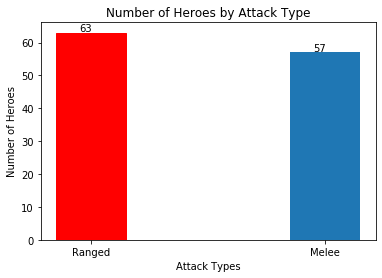

In [68]:
# How many melee and ranged heroes exist?
attack_type_values: List = new_heroes_file['attack_type'].value_counts()
total_ranged: int = attack_type_values[0]
total_melee: int = attack_type_values[1]

#print(f'Total ranged Heroes: {total_ranged}')
#print(f'Total melee Heroes: {total_melee}')

fig, ax = plt.subplots()
plt.ylabel('Number of Heroes')
plt.yticks(np.arange(0, max(attack_type_values) + 10, 10))
plt.xlabel('Attack Types')
plt.title('Number of Heroes by Attack Type')
ax.bar(['Ranged', 'Melee'], attack_type_values, width=0.3)
ax.get_children()[0].set_color('r')

for i, v in enumerate(attack_type_values):
    plt.text(i - 0.05, v + 0.5, str(v))

plt.show()


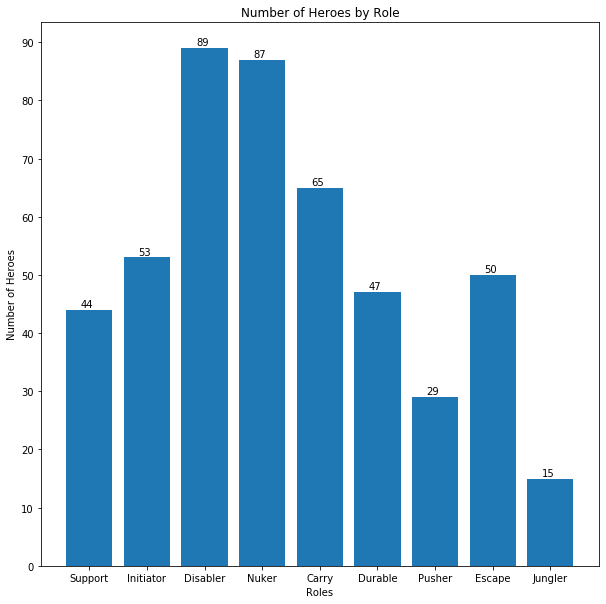

In [49]:
# Roles
roles: Df = new_heroes_file['lst_roles']
count_roles: Dict = Counter([r for x in roles for r in x.split(', ')])
name_roles = list(count_roles.keys())
n_heroes_by_role = list(count_roles.values())

fig, ax = plt.subplots(figsize=(10, 10))
plt.ylabel('Number of Heroes')
plt.yticks(np.arange(0, max(n_heroes_by_role) + 10, 10))
plt.xlabel('Roles')
plt.xticks(np.arange(len(name_roles)), (name_roles))
plt.title('Number of Heroes by Role')
ax.bar(name_roles, n_heroes_by_role)

for i, v in enumerate(n_heroes_by_role):
    plt.text(i - 0.15, v + 0.5, str(v))
            
plt.show()
